### Exploratory Data Analysis

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('salary_data_cleaned.csv')

In [4]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr.' in title.lower() or 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'

In [5]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [6]:
df.job_simp.value_counts()

job_simp
data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: count, dtype: int64

In [7]:
df['seniority'] = df['Job Title'].apply(seniority)

In [8]:
df.seniority.value_counts()

seniority
na        520
senior    220
junior      2
Name: count, dtype: int64

In [9]:
# Fixing 'Los Angeles' State
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [10]:
df.job_state.value_counts()

job_state
CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: count, dtype: int64

In [11]:
# Job Description Length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [12]:
# Competitor Count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(', ')) if x != '-1' else 0)

In [13]:
# Hourly wage to annual wage
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x.hourly == 1 else x.min_salary, axis = 1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x.hourly == 1 else x.max_salary, axis = 1)

In [14]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

### EDA PART

In [15]:
df.describe()

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r_studio,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,469.129380,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,279.793117,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,0.000000,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,221.500000,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,472.500000,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,707.750000,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,955.000000,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [16]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<Axes: >

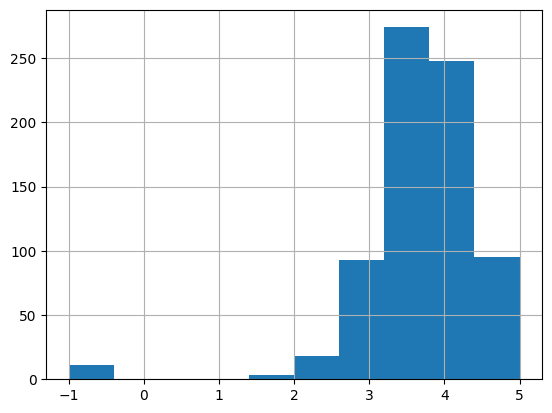

In [17]:
df.Rating.hist()

<Axes: >

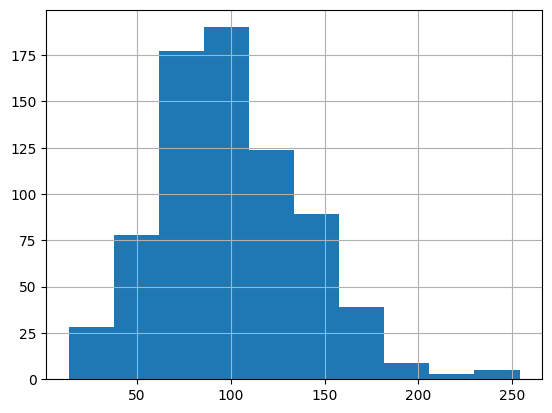

In [18]:
df.avg_salary.hist()

<Axes: >

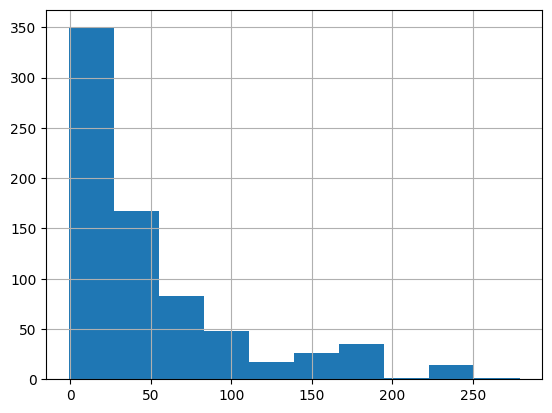

In [19]:
df.age.hist()

<Axes: >

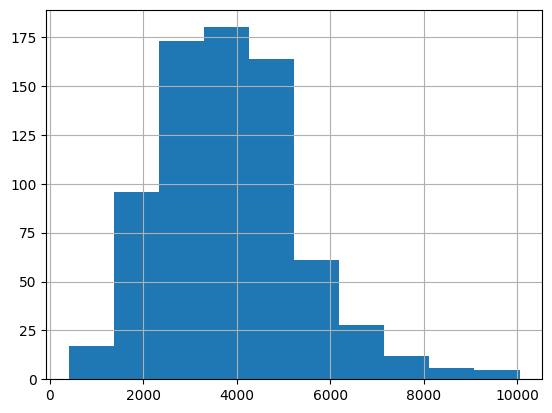

In [20]:
df.desc_len.hist()

<Axes: >

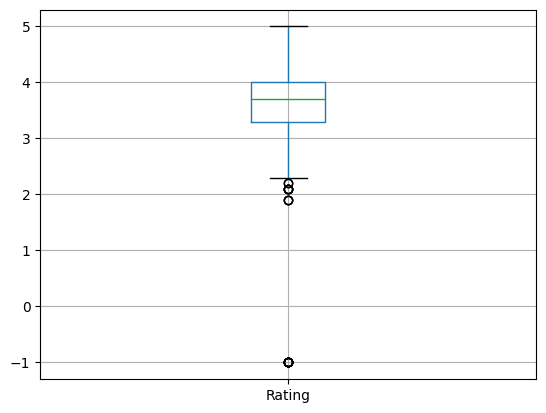

In [21]:
df.boxplot(column = 'Rating')

In [22]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


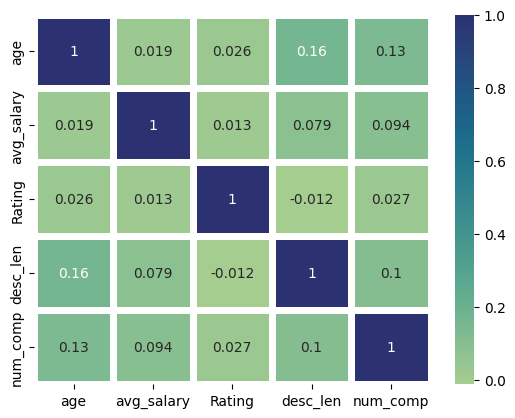

In [23]:
ax = sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len', 'num_comp']].corr(), cmap = 'crest', annot = True, linewidth = 5)

In [38]:
df.to_csv('data_eda.csv')

In [25]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

Graph for Location, total = 200


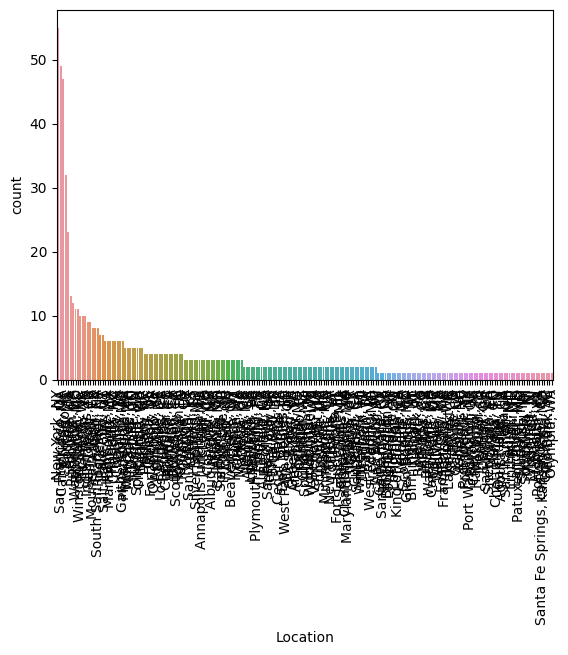

Graph for Headquarters, total = 198


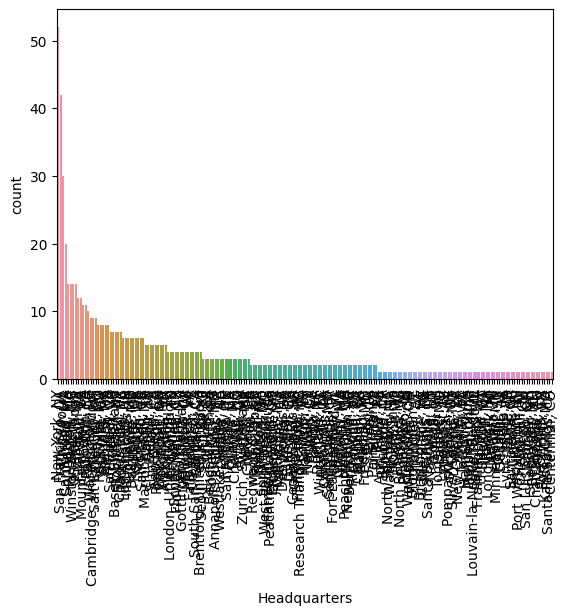

Graph for Size, total = 9


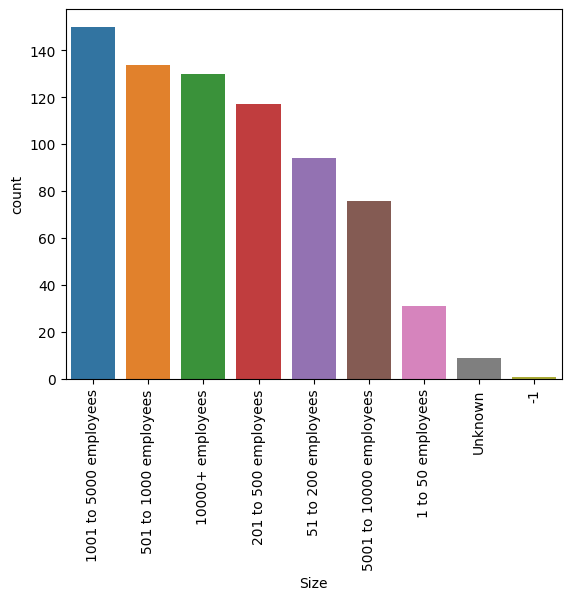

Graph for Type of ownership, total = 11


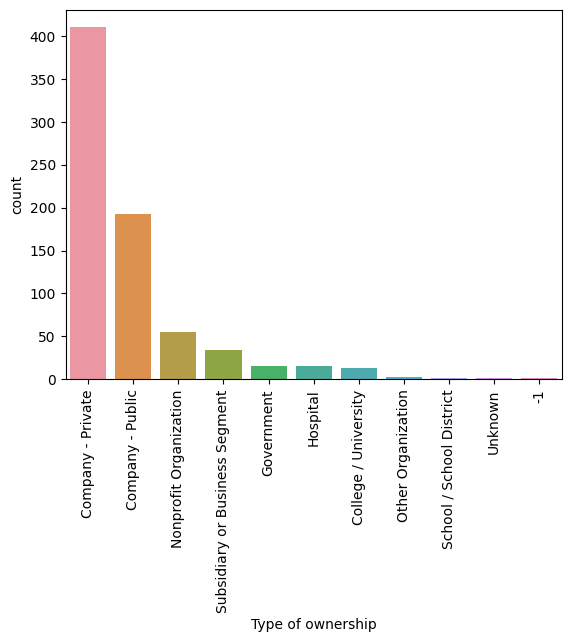

Graph for Industry, total = 60


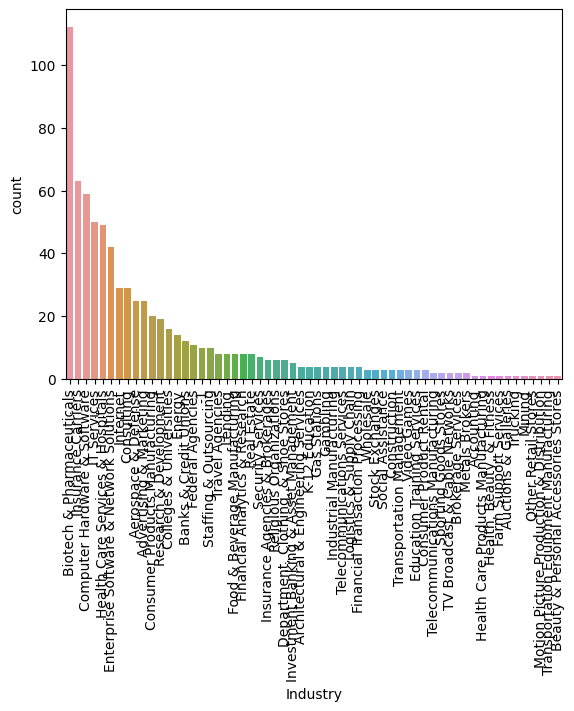

Graph for Sector, total = 25


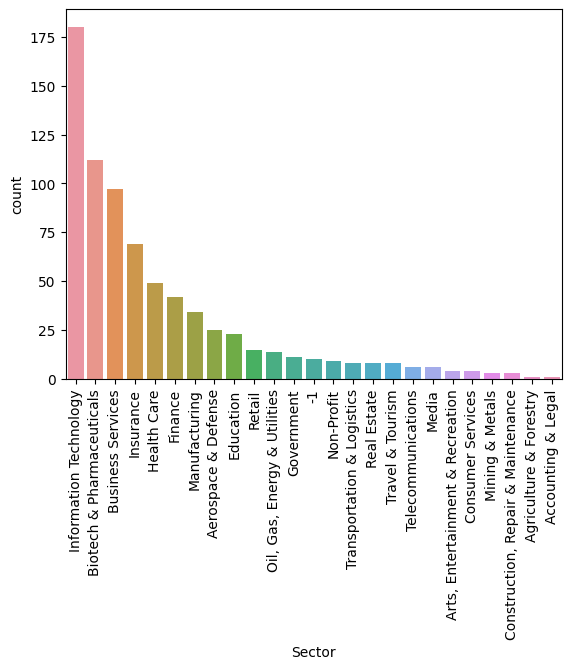

Graph for Revenue, total = 14


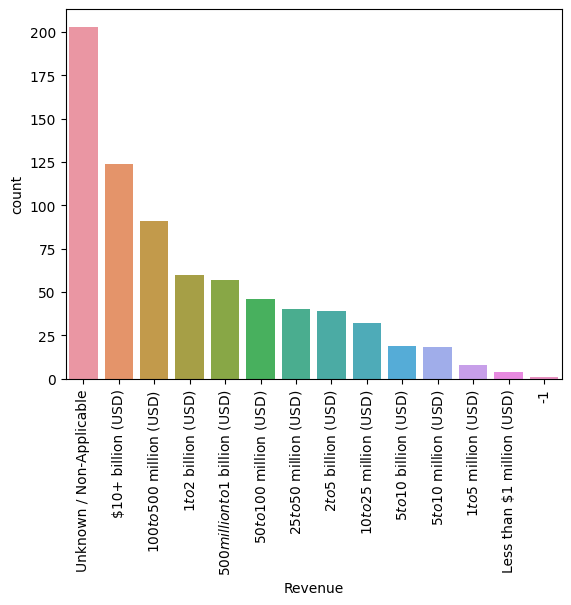

Graph for company_txt, total = 343


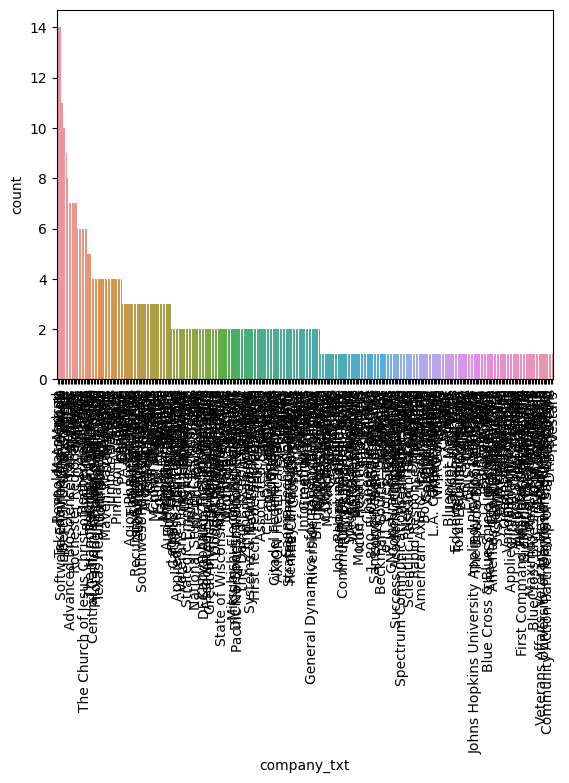

Graph for job_state, total = 37


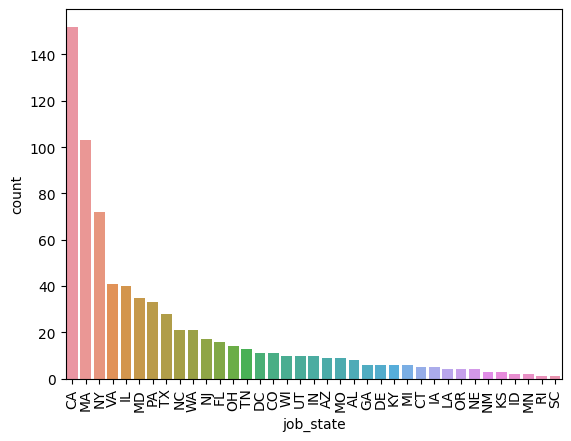

Graph for same_state, total = 2


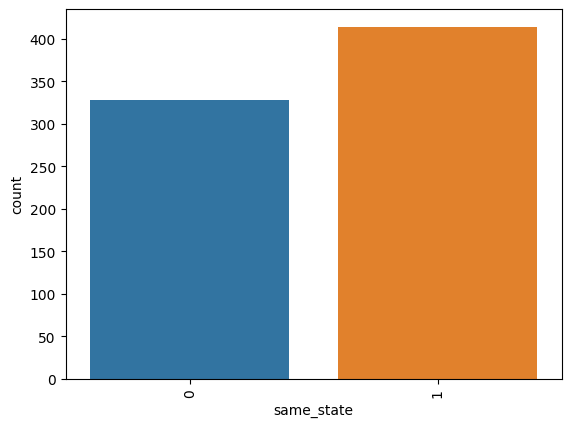

Graph for python, total = 2


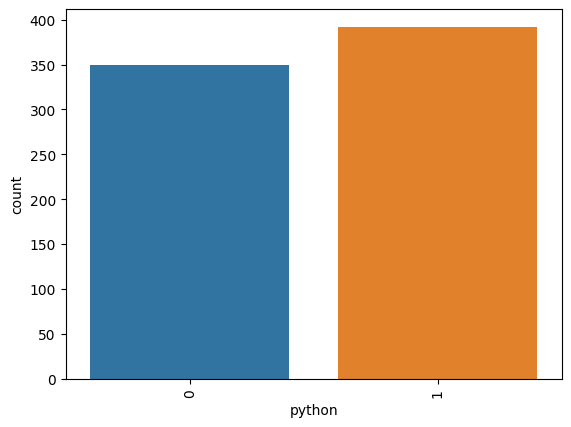

Graph for r_studio, total = 2


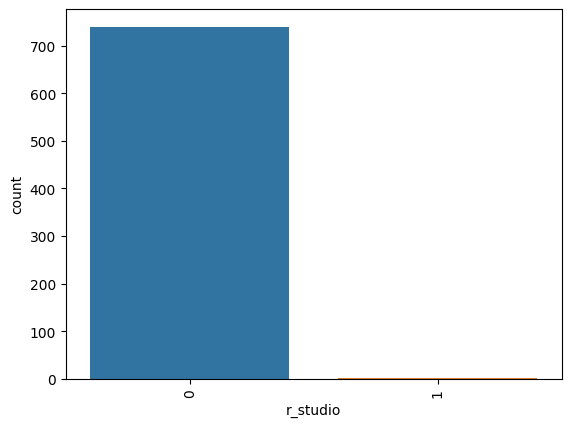

Graph for spark, total = 2


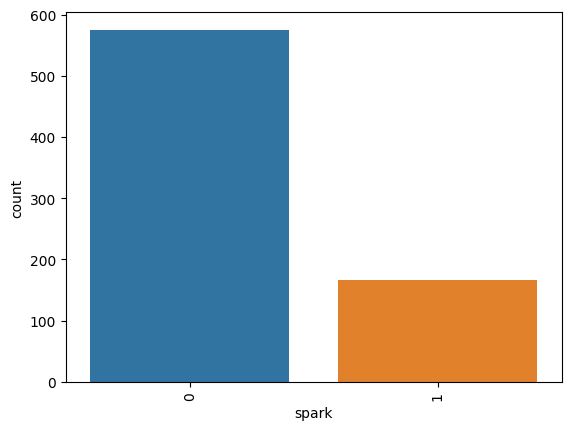

Graph for aws, total = 2


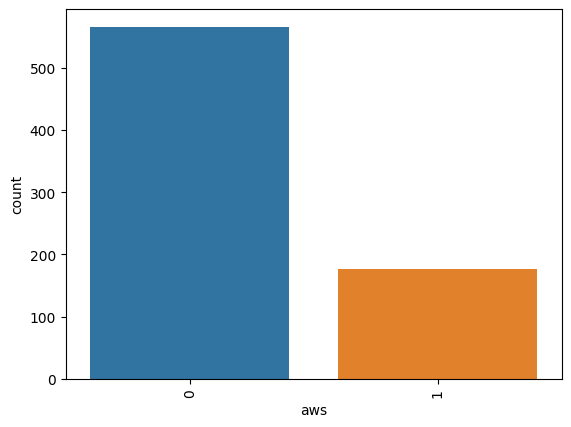

Graph for excel, total = 2


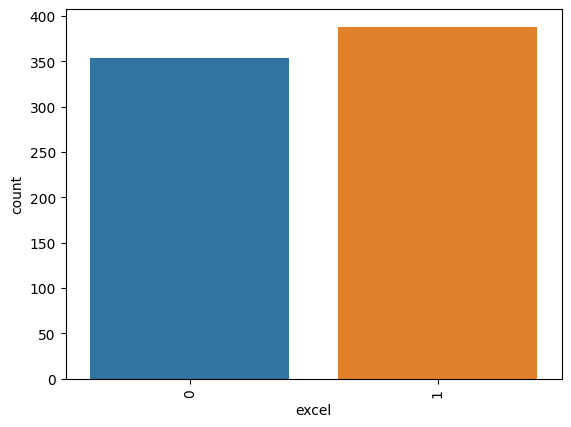

Graph for job_simp, total = 7


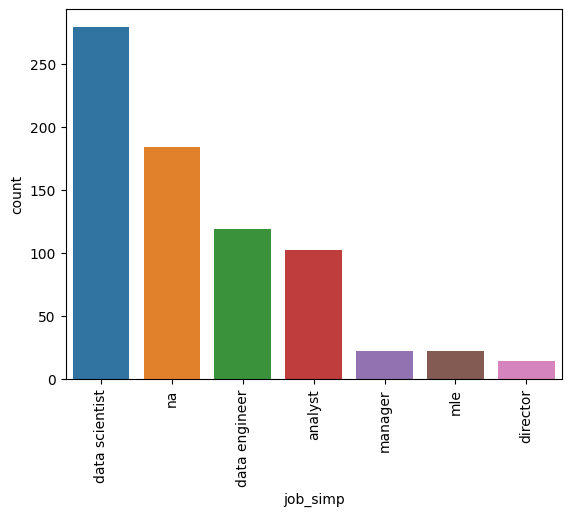

Graph for seniority, total = 3


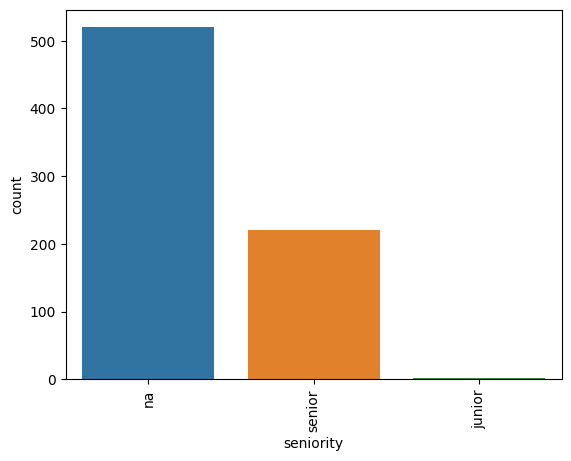

In [26]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for {}, total = {}".format(i, len(cat_num)))
    ax = sns.barplot(x = cat_num.index, y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

Graph for Location, total = 20


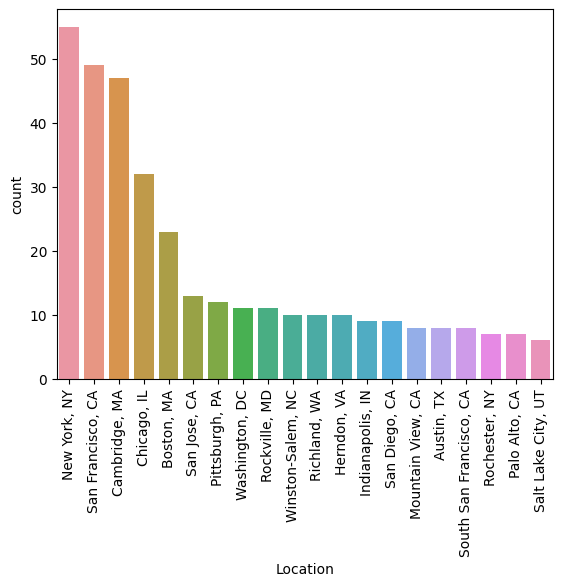

Graph for Headquarters, total = 20


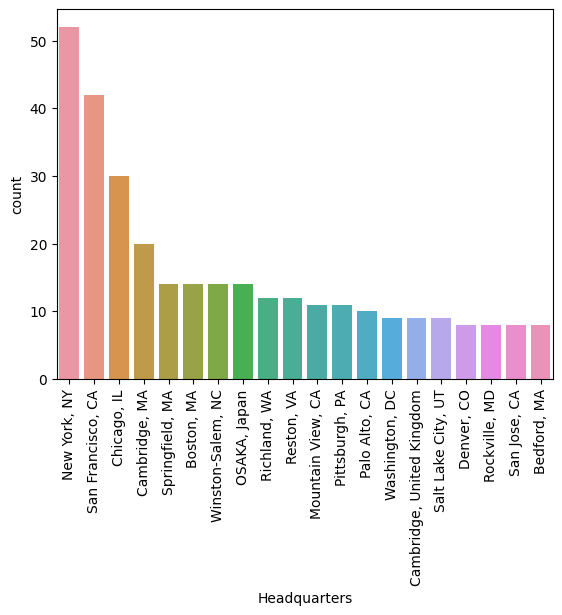

Graph for company_txt, total = 20


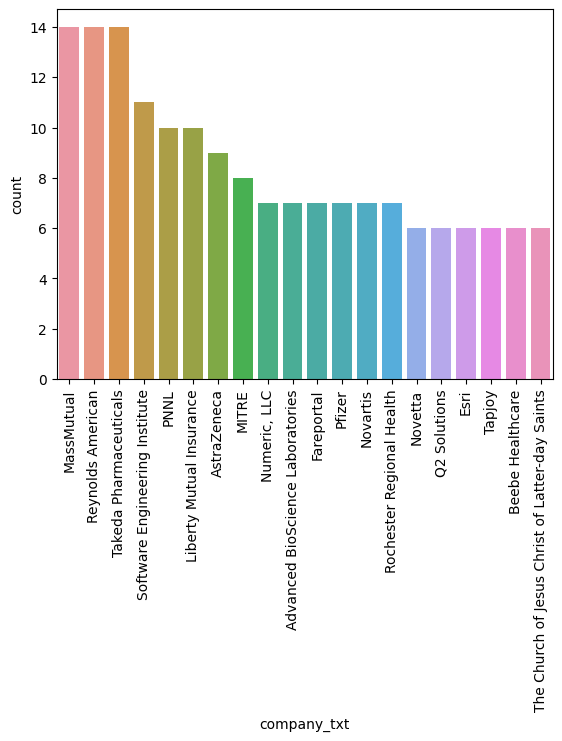

In [27]:
for i in df_cat[['Location', 'Headquarters', 'company_txt']]:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for {}, total = {}".format(i, len(cat_num)))
    ax = sns.barplot(x = cat_num.index, y = cat_num)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
    plt.show()

In [28]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [29]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

avg_salary
job_simp       seniority            
director       na         168.607143
mle            senior     142.071429
data scientist senior     138.956522
data engineer  senior     124.689189
mle            na         119.133333
na             senior     109.061404
data scientist na         107.043011
               junior     106.500000
data engineer  na          96.701220
manager        na          84.022727
analyst        senior      79.092593
na             na          73.988189
analyst        na          61.155405
               junior      56.500000

In [30]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [31]:
# Salary by rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, aws, spark, excel, desc_len, type of ownership
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'desc_len', 'Type of ownership', 'avg_salary']]

In [32]:
for i in df_pivots.columns:
    print(i)
    if i != 'avg_salary':
        print(pd.pivot_table(data = df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [33]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [34]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [35]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    # Remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

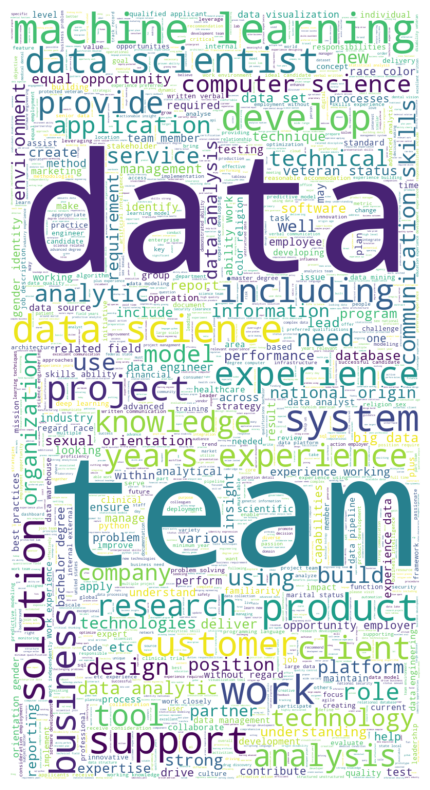

In [37]:
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

wc = WordCloud(background_color = 'white', random_state = 1, stopwords = STOPWORDS, max_words = 2000, width = 800, height = 1500)
wc.generate(text)

plt.figure(figsize = [10, 10])
plt.imshow(X = wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()